In [30]:
def determine_gene_type(alleles,selfish_allele_is_dominant):
    if selfish_allele_is_dominant:
        if 's' in alleles:
            return 'selfish' 
        else:
            return 'altruist'
    else:
        if 'a' in alleles:
            return 'altruist'
        else:
            return 'selfish' 

In [31]:
import random
class Organism:
    def __init__(self, alleles, probability_to_engage_w_opposite_characteristic, selfish_allele_is_dominant):
        self.alleles = alleles
        self.gene_type = determine_gene_type(self.alleles,selfish_allele_is_dominant)
        self.prob_eng_same = 1 - probability_to_engage_w_opposite_characteristic
        self.prob_eng_opposite = probability_to_engage_w_opposite_characteristic
        
    def get_gene_type(self):
        return self.gene_type

    def get_prob_eng_opposite(self):
        return self.prob_eng_opposite

    def mating_decision(self, mate_gene_type):
        """function that determines whether organism wants to reproduce with a potential mate using probabiliti.
            If if does, returns true otherwise it return false """
        value = random.uniform(0,1)

        if mate_gene_type != self.gene_type:
            if value <= self.prob_eng_opposite:
                return True
            else:
                return False

        else:
            if value <= self.prob_eng_same:
                return True
            else:
                return False
            

In [87]:
import matplotlib.pyplot as plt
class Population:
    def __init__(self, pop_size, proportion_altruism,altruist_probability_to_engage_w_opposite_characteristic,\
                selfish_probability_to_engage_w_opposite_characteristic, reproductive_fitness_table, \
                selfish_allele_is_dominant, growth_factor = 1, oscillation_factor = 0 ):
        
        self.selfish_allele_is_dominant = selfish_allele_is_dominant
        self.pop_size = pop_size
        self.round_number = 0
        self.growth_factor = growth_factor
        self.oscillation_factor = oscillation_factor
        
        self.statistics_selfish = list()
        self.statistics_aa = list()
        self.statistics_ss = list()
        self.statistics_as = list()
        
        
        self.organisms_curr_gen = list()
        self.organisms_new_gen = list()
        self.organisms = list()
        self.selfish_probability_to_engage_w_opposite_characteristic = selfish_probability_to_engage_w_opposite_characteristic
        self.altruist_probability_to_engage_w_opposite_characteristic = altruist_probability_to_engage_w_opposite_characteristic
        self.nb_altruists = 0
        self.nb_selfish = 0
        self.nb_aa = 0 #number of alleles with 'aa'
        self.nb_ss = 0 #number of alleles with 'ss'
        self.nb_as = 0 #number of alleles with 'as'
        self.reproductive_fitness_table = reproductive_fitness_table
        
        for i in range(self.pop_size):
            tmp = random.uniform(0,1)
            allele1 = 's' if tmp > proportion_altruism else 'a'
            tmp = random.uniform(0,1)
            allele2 = 's' if tmp > proportion_altruism else 'a'
            
            alleles = allele1 + allele2
       
            gene_type = determine_gene_type(alleles,self.selfish_allele_is_dominant)
            if gene_type == 'selfish':
                self.organisms_curr_gen.append(Organism(alleles, selfish_probability_to_engage_w_opposite_characteristic, self.selfish_allele_is_dominant))
                self.nb_selfish += 1           
            else:
                self.organisms_curr_gen.append(Organism(alleles, altruist_probability_to_engage_w_opposite_characteristic, self.selfish_allele_is_dominant))
                self.nb_altruists += 1  
                 
    def plot_results(self):
        """Generate a plot of the current simulation data stored in teh statistcs field
        """
        x = []
        y = []
        for stat in self.statistics_selfish:
            x.append(stat[0])
            y.append(stat[1])
        plt.plot(x, y, color = 'red', label = 'phenotype selfish')
        
        x = []
        y = []
        for stat in self.statistics_aa:
            x.append(stat[0])
            y.append(stat[1])
        plt.plot(x, y , 'green', label = 'allele aa')
        
        x = []
        y = []
        for stat in self.statistics_as:
            x.append(stat[0])
            y.append(stat[1])
        plt.plot(x, y , 'orange', label = 'allele as')
        
        x = []
        y = []
        for stat in self.statistics_ss:
            x.append(stat[0])
            y.append(stat[1])
        plt.plot(x, y, 'blue', label = 'allele ss')
        
        
        plt.xlabel('Generation number')
        plt.ylabel('Proportion roportion') 
        plt.legend()
        plt.title('Evolution of the population in ' + str(self.round_number) + ' generations') 
        plt.show()

            
    def calc_gen_stat(self):
        """Compute statistics of the current generation and update the class statistics field
            that will be used for plotting
        """
        selfish_cnt = 0
        aa_cnt = 0
        as_cnt = 0
        ss_cnt = 0
        
        for organism in self.organisms_curr_gen:
            if organism.alleles == 'aa':
                aa_cnt += 1
            elif organism.alleles == 'ss':
                ss_cnt += 1
            else:
                as_cnt += 1
                
            if (organism.get_gene_type() == "selfish"):
                selfish_cnt += 1
                
        self.statistics_selfish.append((self.round_number,selfish_cnt/len(self.organisms_curr_gen)))
        self.statistics_aa.append((self.round_number,aa_cnt/len(self.organisms_curr_gen)))
        self.statistics_ss.append((self.round_number,ss_cnt/len(self.organisms_curr_gen)))
        self.statistics_as.append((self.round_number,as_cnt/len(self.organisms_curr_gen)))

    def get_gen_stat(self):
        return self.statistics_selfish,self.statistics_aa,self.statistics_ss,self.statistics_as

    def create_progeny(self, organism1, organism2):
        """Update the number of selfish/altruist organism in the population.
        This step is the first one the steps that will perform the reproduction of the current generation.
        This function is called for every couple formed in population and every organism will generate a number of 
        sons equal to his fitness. The type of the Sons will be equal to the parent generating them.
        Afterwards, another function will resize the population in order to avoid divergence of it's size.

        Args:
            organism1 (Organism): the first partner of the formed couple
            organism2 (Organism): the second partner of the formed couple
        """
        organism1_gene_type = organism1.get_gene_type()
        organism2_gene_type = organism2.get_gene_type()

        nb_progeny_organism1, nb_progeny_organism2 = self.reproductive_fitness_table[organism1_gene_type + '_' + organism2_gene_type]
        
        total_progeny = nb_progeny_organism1 + nb_progeny_organism2
        
        organism1_prob = nb_progeny_organism1/total_progeny
        organism2_prob = nb_progeny_organism2/total_progeny
        
    
        #add to count nb_altruists and nb_selfish of next generation
        for i in range(total_progeny):
            allele1 = None
            allele2 = None
            
            value = random.uniform(0,1)
            random_index = random.randint(0,1)
            if value < organism1_prob:
                allele1 = organism1.alleles[random_index]
            else:
                allele1 = organism2.alleles[random_index]

            value = random.uniform(0,1)
            random_index = random.randint(0,1)
            if value < organism1_prob:
                allele2 = organism1.alleles[random_index]
            else:
                allele2 = organism2.alleles[random_index]
                
            alleles = allele1 + allele2
            
            if alleles == 'aa':
                self.nb_aa +=1
            elif alleles == 'ss':
                self.nb_ss +=1
            else:
                self.nb_as +=1
        
    def both_candidates_agree_to_reproduce(self,organism1, organism2):
        """This function is used to form couples in the population.
        If both organisms agree to reproduce with the other partner
        the function will return true, otherwise will return false

        Args:
            organism1 (Organism): the first partner of the formed couple
            organism2 (Organism): the second partner of the formed couple

        Returns:
            Boolean: Boolean that indicates if the couple is formed
        """
        candidate1_decision = organism1.mating_decision(organism2.gene_type)
        candidate2_decision = organism2.mating_decision(organism1.gene_type)
        #both have to agree to reproduce
        return candidate1_decision and candidate2_decision
        
    def run_round(self):
        """This function runs a single round of a simulation.
            We pass from generation i to generation (i+1).
        """
        self.nb_aa = 0 #number of alleles with 'aa'
        self.nb_ss = 0 #number of alleles with 'ss'
        self.nb_as = 0 #number of alleles with 'ss'
        self.nb_altruists = 0
        self.nb_selfish = 0
        while len(self.organisms_curr_gen) > 1:
            index_organism_1 = random.randint(0,len(self.organisms_curr_gen)-1)
            index_organism_2 = random.randint(0,len(self.organisms_curr_gen)-1)
            organism1 = self.organisms_curr_gen[index_organism_1]
            organism2 = self.organisms_curr_gen[index_organism_2]
            if index_organism_1 != index_organism_2 and self.both_candidates_agree_to_reproduce(organism1, organism2):

                self.create_progeny(organism1,organism2)

                if index_organism_1 < index_organism_2:  
                    self.organisms_curr_gen.pop(index_organism_2)
                    self.organisms_curr_gen.pop(index_organism_1)
                else:
                    self.organisms_curr_gen.pop(index_organism_1)
                    self.organisms_curr_gen.pop(index_organism_2)

        self.subsample_new_gen(growth_factor = self.growth_factor ,oscillation_factor = self.oscillation_factor)
        self.organisms_curr_gen = self.organisms_new_gen.copy()
        self.organisms_new_gen = list()
        self.pop_size = len(self.organisms_curr_gen)
        
    def subsample_new_gen(self,growth_factor = 1,oscillation_factor = 0):
        """Subsample the next generation created in order to mantain a given population size
            The growth factor can be used to add a drive in population size ()
            The oscillation factor can be used to generate some variation of pop size between generations. N ~ (0,oscillation_factor)
        """
        variation = random.gauss(0, oscillation_factor)
        self.organisms_new_gen = []
        next_pop_size = self.pop_size*(growth_factor+variation)
        
        tot_children = self.nb_aa + self.nb_as + self.nb_ss
        
        proportion_aa= self.nb_aa/(tot_children)
        proportion_ss = self.nb_ss/(tot_children)
        proportion_as = self.nb_as/(tot_children)
        
        gene_type_as = determine_gene_type('as',self.selfish_allele_is_dominant)
            
        for i in range(int(round(next_pop_size*proportion_aa,0))):
            self.organisms_new_gen.append(Organism("aa", self.altruist_probability_to_engage_w_opposite_characteristic, self.selfish_allele_is_dominant))
            
        for i in range(int(round(next_pop_size*proportion_as,0))):
            if gene_type_as == 'selfish':
                self.organisms_new_gen.append(Organism("as", self.selfish_probability_to_engage_w_opposite_characteristic, self.selfish_allele_is_dominant))
            else:
                self.organisms_new_gen.append(Organism("as", self.altruist_probability_to_engage_w_opposite_characteristic, self.selfish_allele_is_dominant))
                
        for i in range(int(round(next_pop_size*proportion_ss,0))):
            self.organisms_new_gen.append(Organism("ss", self.selfish_probability_to_engage_w_opposite_characteristic, self.selfish_allele_is_dominant))
            
    def run_simulation(self,n_rounds,show_plot = True):
        """This function runs a simulation of n_rounds on the population.

        Args:
            n_rounds (Int): The number of rounds that the simulation will last.
            show_plot (bool, optional): Option used to display the plot at the end of the simulation. Defaults to True.
        """
        for i in range(n_rounds):
            self.calc_gen_stat()
            self.run_round()
            self.round_number += 1
        self.calc_gen_stat()
        if show_plot:
            self.plot_results()



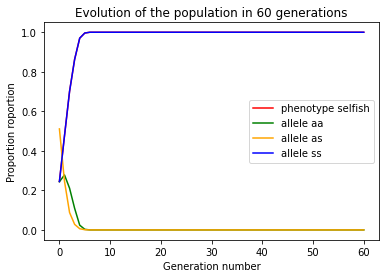

In [81]:
pop_size = 1000
proportion_altruism = 0.5
altruist_probability_to_engage_w_opposite_characteristic = 0.5
selfish_probability_to_engage_w_opposite_characteristic = 0.5
selfish_allele_is_dominant = False
reproductive_fitness_table = {'selfish_selfish': (5,5), 'altruist_altruist': (11,11), 'altruist_selfish': (0,20),'selfish_altruist': (20,0) } 
pop = Population(pop_size, proportion_altruism,altruist_probability_to_engage_w_opposite_characteristic, \
                    selfish_probability_to_engage_w_opposite_characteristic, reproductive_fitness_table,selfish_allele_is_dominant )
pop.run_simulation(60)

In [96]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib



def plot_simulation(n_rounds, step_size,selfish_allele_is_dominant = True):
    plt.rcParams["figure.figsize"] = (12,12)
    simulations_stats_x = []
    simulations_stats_y = []
    proportion_label = []
    simulation_colors = []
    pop_size = 1000
    proportion_altruism = 0.5

    reproductive_fitness_table = {'selfish_selfish': (5,5), 'altruist_altruist': (5,5), 'altruist_selfish': (5,5),'selfish_altruist': (5,5) } 
   
    for altruist_iterator in range(int(1/step_size)):
        print(altruist_iterator, end = ' ')
        altruist_probability_to_engage_w_opposite_characteristic = altruist_iterator * step_size
        tmp_stats = []
        for selfish_iterator in range(int(1/step_size)):
            if altruist_iterator != 0 and selfish_iterator != 0: 
    
                selfish_probability_to_engage_w_opposite_characteristic = selfish_iterator * step_size
                
                pop = Population(pop_size, proportion_altruism,altruist_probability_to_engage_w_opposite_characteristic, \
                                    selfish_probability_to_engage_w_opposite_characteristic, reproductive_fitness_table , \
                                    selfish_allele_is_dominant)

                pop.run_simulation(n_rounds,show_plot = False)

                simulation_stat,_,_,_ = pop.get_gen_stat()
                
                if simulation_stat[-1][1] >= 0.5:
                    tmp_stats.append((selfish_probability_to_engage_w_opposite_characteristic,'selfish',simulation_stat[-1][1]))
                else:
                    tmp_stats.append((selfish_probability_to_engage_w_opposite_characteristic,'altruist', simulation_stat[-1][1]))
                    
        for selfish_prob,result,proportion in tmp_stats:
            simulations_stats_x.append(altruist_probability_to_engage_w_opposite_characteristic)
            simulations_stats_y.append(selfish_prob)
            simulation_colors.append('red' if result == 'altruist' else 'blue')
            proportion_label.append(proportion)
            
    fig, ax = plt.subplots()       
    colors = [(0, 0, 1), (1, 0, 0)] # first color is black, last is red
    cm = LinearSegmentedColormap.from_list("Custom", colors, N=100)
    
    my_labels = {'red': 'altruist', 'blue': 'selfish'}
    print()
    for i in range(len(simulations_stats_x)):
        if my_labels[simulation_colors[i]] != "_nolegend_":
            ax.scatter(simulations_stats_x[i],simulations_stats_y[i],color = cm(int(round(proportion_label[i],2)*100)), label =my_labels[simulation_colors[i]], s = 100)
            my_labels[simulation_colors[i]] = "_nolegend_"
        else:
            ax.scatter(simulations_stats_x[i],simulations_stats_y[i],color = cm(int(round(proportion_label[i],2)*100)),s = 100)
        ax.annotate(round(proportion_label[i],2) , (simulations_stats_x[i] +0.01, simulations_stats_y[i]+0.01))
   
    ax.set_title('Sim Results of Varying Prob to Engage with Opposite Gene Types ('+ str(n_rounds) + ' rounds, pop_size = ' + str(pop_size) + ')' )
    ax.set_xlabel('probability of altruist gene accepting to mate with selfish gene')
    ax.set_ylabel('probability of selfish gene accepting to mate with altruist gene')
    bounds = [ x/100 for x in range(0,101,1)]
    norm = matplotlib.colors.BoundaryNorm(bounds, cm.N)
    cbar = fig.colorbar(matplotlib.cm.ScalarMappable(cmap=cm), shrink = 0.8, ax = ax)
    cbar.set_label('proportion of selfish genes', rotation = 90)
    ax.autoscale_view()
    plt.show()
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

SIMULATION WITH ORIGNAL TABLE FROM PAPER: {'selfish_selfish': (5,5), 'altruist_altruist': (11,11), 'altruist_selfish': (0,20),'selfish_altruist': (20,0) } 

0 1 2 3 4 5 6 7 8 9 


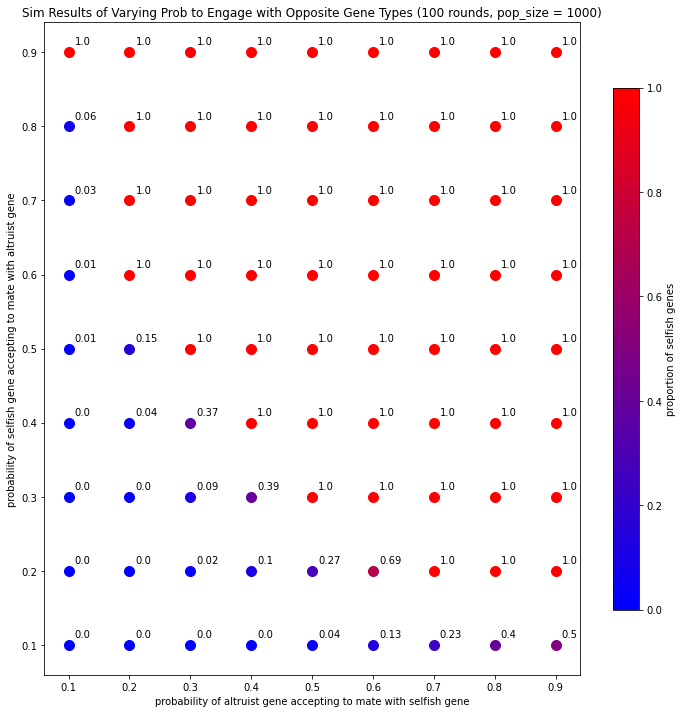

In [91]:
plot_simulation(100,0.1)

0 1 2 3 4 5 6 7 8 9 


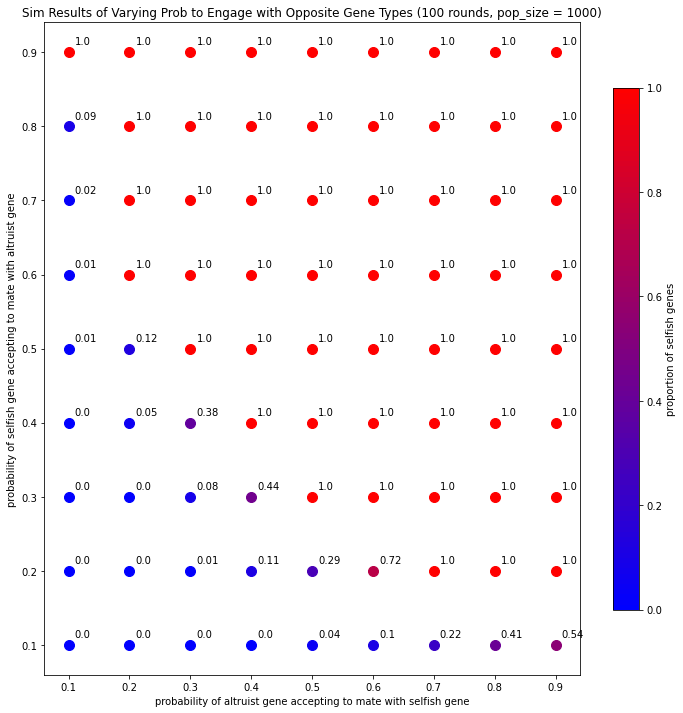

In [92]:
plot_simulation(100, 0.1,selfish_allele_is_dominant = False)

reproductive_fitness_table = {'selfish_selfish': (5,5), 'altruist_altruist': (11,11), 'altruist_selfish': (3,20),'selfish_altruist': (20,3) } 

0 1 2 3 4 5 6 7 8 9 


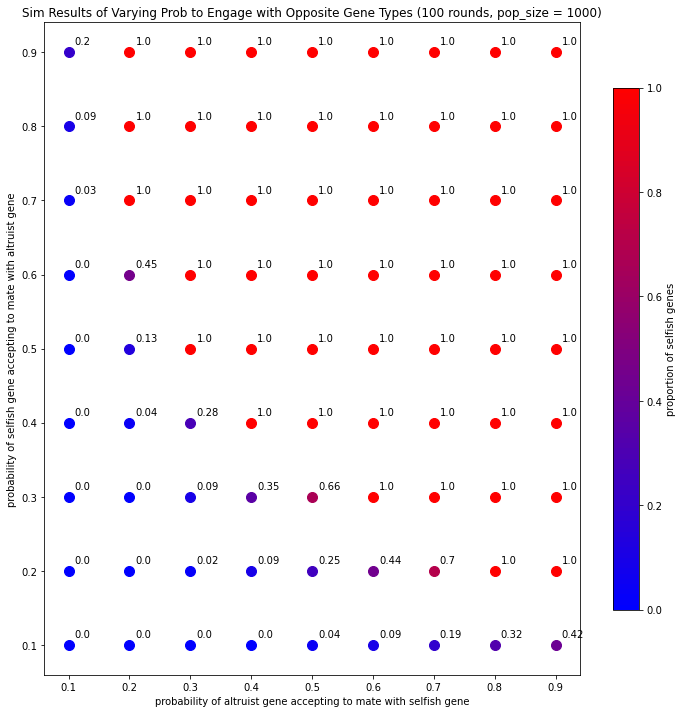

In [94]:
plot_simulation(100,0.1)

0 1 2 3 4 5 6 7 8 9 


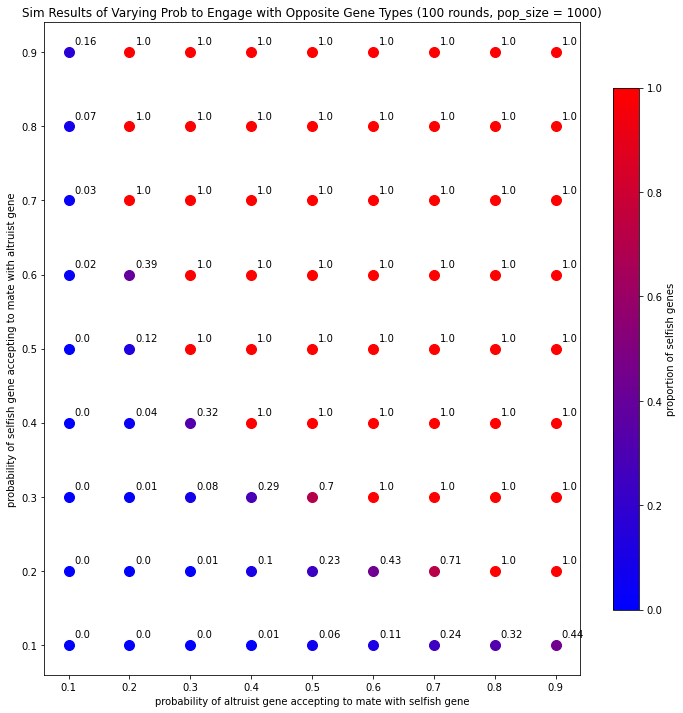

In [95]:
plot_simulation(100, 0.1,selfish_allele_is_dominant = False)

reproductive_fitness_table = {'selfish_selfish': (5,5), 'altruist_altruist': (5,5), 'altruist_selfish': (5,5),'selfish_altruist': (5,5) } 

0 1 2 3 4 5 6 7 8 9 


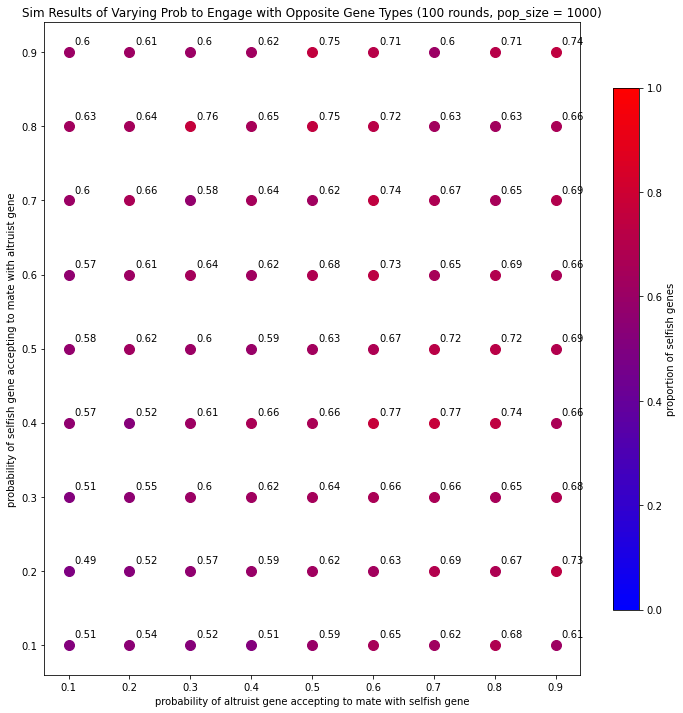

In [97]:
plot_simulation(100,0.1)

0 1 2 3 4 5 6 7 8 9 


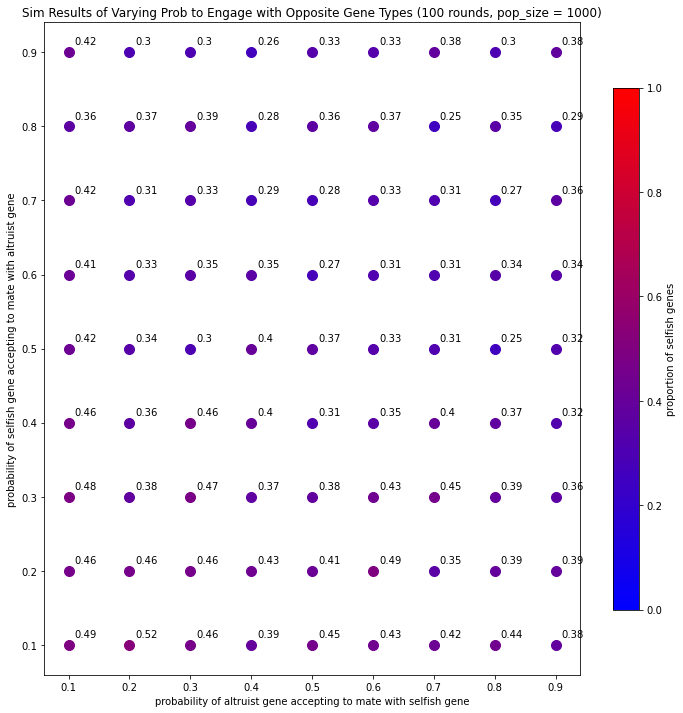

In [98]:
plot_simulation(100, 0.1,selfish_allele_is_dominant = False)